This notebook is for Data Science practice.\
The data I use is Shopee Code League 2020- Marketing Analytics.

For more information about this Code League, see the following kaggle official link: [Ref](https://www.kaggle.com/competitions/open-shopee-code-league-marketing-analytics/data)

# 1. Load Data

In [1]:
import numpy as np
import pandas as pd

We first walk through `_DA_Marketing_Analytics` part

In [2]:
path = 'C:/Users/2022080101/Desktop/Shopee_Dataset_2020/_DA_Marketing_Analytics'

In [3]:
import os

In [4]:
print(os.listdir(path))

['sample_submission_0_1.csv', 'test.csv', 'train.csv', 'users.csv']


There are 4 files in the folder.

First, we see the train.csv file.

In [5]:
file = os.listdir(path)

In [6]:
df = pd.read_csv(path+'/'+file[2])

In [7]:
df.head(10)

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
5,4,2019-07-16 00:00:00+08:00,246,44,5,8,70,3,7,13,6,18,45,0,0,7,0,5
6,5,2019-07-16 00:00:00+08:00,258,43,13,3,3,0,0,0,9,32,46,2,3,3,0,6
7,6,2019-07-16 00:00:00+08:00,288,49,163,1,28,0,0,0,4,19,45,0,5,7,0,7
8,1,2019-07-16 00:00:00+08:00,350,49,7,5,26,2,4,7,1,8,10,0,1,1,1,8
9,4,2019-07-16 00:00:00+08:00,417,44,7,10,12,2,6,14,6,11,17,0,1,1,0,9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 73539 non-null  int64 
 1   grass_date                   73539 non-null  object
 2   user_id                      73539 non-null  int64 
 3   subject_line_length          73539 non-null  int64 
 4   last_open_day                73539 non-null  object
 5   last_login_day               73539 non-null  object
 6   last_checkout_day            73539 non-null  object
 7   open_count_last_10_days      73539 non-null  int64 
 8   open_count_last_30_days      73539 non-null  int64 
 9   open_count_last_60_days      73539 non-null  int64 
 10  login_count_last_10_days     73539 non-null  int64 
 11  login_count_last_30_days     73539 non-null  int64 
 12  login_count_last_60_days     73539 non-null  int64 
 13  checkout_count_last_10_days  73

In [9]:
df.shape

(73539, 18)

# Columns Description

According to the description from [Shopee Code League - Marketing Analytics](https://www.kaggle.com/competitions/open-shopee-code-league-marketing-analytics/data) \
we have
* country_code: An integer code for the country where the user lives.

* grass_date: The date when the email was sent.

* user_id: the unique identifier of each user

* subject_line_length: the number of characters in the subject of the email

* last_open_day: How many days ago was the last time the user opened an email

* last_login_day: How many days ago the user last logged in its Shopee account

* last_checkout_day: How many days ago the user last purchased on Shopee

* open_count_last_[10/30/60]_days: the total number of email opens in the last N days.

* login_count_last_[10/30/60]_days: the total number of user logins in the last N days.

* checkout_count_last_[10/30/60]_days: the total number of checkouts (=purchases) by the user in the last N days.

* open_flag: the target variable. Whether or not the email was opened.

* row_id:

We explore these features to know more about the data.

In [10]:
import matplotlib.pyplot as plt

In [11]:
df.country_code.value_counts()

1    28423
2    13874
3    13845
4     6302
5     5536
6     3221
7     2338
Name: country_code, dtype: int64

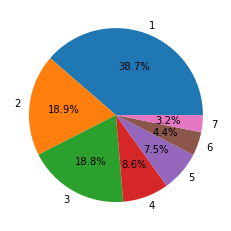

In [12]:
# coutry_code pie chart
count = df.country_code.value_counts()
plt.pie(x = count.values,labels = count.index,autopct='%1.1f%%'); # add ; to hide the text.

First, we can see that the top 3 most customer are from country 1 to 3.\
Intrestingly, the encoding method may be the sorting values.

In [13]:
df.grass_date.unique()

array(['2019-07-16 00:00:00+08:00', '2019-07-17 00:00:00+08:00',
       '2019-07-18 00:00:00+08:00', '2019-07-19 00:00:00+08:00',
       '2019-07-20 00:00:00+08:00', '2019-07-21 00:00:00+08:00',
       '2019-07-22 00:00:00+08:00', '2019-07-23 00:00:00+08:00',
       '2019-07-24 00:00:00+08:00', '2019-07-25 00:00:00+08:00',
       '2019-07-26 00:00:00+08:00', '2019-07-27 00:00:00+08:00',
       '2019-07-28 00:00:00+08:00', '2019-07-29 00:00:00+08:00',
       '2019-07-30 00:00:00+08:00', '2019-08-01 00:00:00+08:00',
       '2019-08-02 00:00:00+08:00', '2019-08-03 00:00:00+08:00',
       '2019-08-04 00:00:00+08:00', '2019-08-05 00:00:00+08:00',
       '2019-08-06 00:00:00+08:00', '2019-08-07 00:00:00+08:00',
       '2019-08-08 00:00:00+08:00', '2019-08-09 00:00:00+08:00',
       '2019-08-10 00:00:00+08:00', '2019-08-11 00:00:00+08:00',
       '2019-08-12 00:00:00+08:00', '2019-08-13 00:00:00+08:00',
       '2019-08-14 00:00:00+08:00', '2019-08-15 00:00:00+08:00',
       '2019-08-16 00:00:

We find that there are no `2019-07-31` and `2019-08-31` in `grass_date`.

In [14]:
df.user_id.duplicated().any()

True

Some user_id may appear several times.

In [15]:
duplicated_id = df[df.user_id.duplicated()].user_id.unique()
# store the duplicated user_id as duplicated_id

In [16]:
df[df['user_id'] == duplicated_id[0]] #Pick out 1 duplicated user_id to see what is the difference of each feature.

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
337,5,2019-07-16 00:00:00+08:00,19732,43,4,1,1,0,0,0,9,27,68,3,5,14,0,337
2669,5,2019-07-17 00:00:00+08:00,19732,33,5,2,2,0,0,0,9,28,69,3,5,14,0,2669


Suppose that there is no typo or wrong value issue.\
In user_id = 19732 case, we find that Shopee send the second mail after the 1st send.\
The differences are that:
1. subject_line_length is shorter in the second e-mail.
2. This user hasn't opened the 1st and 2nd e-mail.
3. This user has not opened any e-mail last 60 days, but he logined 9 times in 10 days, 27-28 times in 30 days, and 68-69 times in 60 days. This shows that this user nearly logins everyday but not opens any e-mail.
4. This user bought 3 times in 10 days, 5 times in 30 days, and 14 times in 60 days. I will classify this user as a frequent buyer.

The above is a one-case study, we move on to anothre feature.

In [17]:
subject_length = df.subject_line_length.apply(lambda x: round(int((x + 9) / 10) * 10))

In [18]:
max(subject_length)

80

In [19]:
subject_length.value_counts()

40    23964
50    20470
60    17032
30     7083
70     4197
20      348
10      283
80      162
Name: subject_line_length, dtype: int64

In [20]:
xx = subject_length.value_counts().index

In [21]:
yy = subject_length.value_counts().values

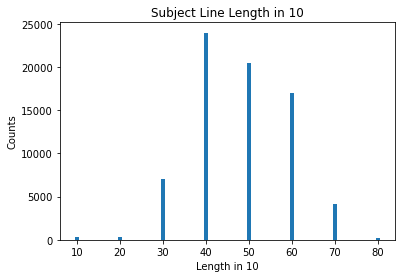

In [22]:
# We plot a bar chart of subject_line_length

fig, ax = plt.subplots()
ax.bar(xx, yy)
ax.set_xlabel('Length in 10')
ax.set_ylabel('Counts')
ax.set_title('Subject Line Length in 10')

plt.show()

E-mail subject length are concentrates on the range of (40,60)

In [23]:
df.last_open_day.unique()

array(['19', '9', '14', '49', '227', '5', '13', '163', '7', '130', '27',
       'Never open', '4', '24', '28', '12', '23', '70', '83', '26', '17',
       '2', '3', '182', '58', '22', '20', '10', '8', '82', '87', '41',
       '115', '207', '16', '11', '29', '77', '48', '34', '263', '25',
       '30', '56', '21', '180', '91', '90', '47', '64', '61', '401', '78',
       '86', '32', '76', '75', '55', '38', '15', '39', '36', '71', '169',
       '59', '224', '18', '85', '143', '208', '72', '140', '62', '60',
       '296', '164', '362', '125', '35', '168', '74', '73', '154', '210',
       '46', '33', '53', '69', '37', '93', '221', '233', '347', '42',
       '116', '54', '148', '340', '66', '96', '89', '361', '134', '701',
       '79', '43', '107', '293', '379', '268', '63', '216', '84', '138',
       '446', '145', '104', '98', '280', '369', '249', '97', '103', '170',
       '57', '40', '301', '552', '246', '267', '81', '297', '51', '466',
       '540', '306', '422', '44', '230', '174', '108',

We convert the 'Never open' to a negative number, says, -20.

In [24]:
df.last_open_day=df.last_open_day.replace(to_replace="Never open",value=-20)

In [25]:
df.last_open_day = df.last_open_day.apply(int)

In [26]:
df.last_open_day.describe()

count    73539.000000
mean        27.360190
std         54.659461
min        -20.000000
25%          3.000000
50%         12.000000
75%         33.000000
max        808.000000
Name: last_open_day, dtype: float64

The time span is too wide, if we want to visualize it, we need to winsorize the data.\
We truncate the number larger than 365 to be 365.

In [27]:
df.last_open_day[:] = df.last_open_day.apply(lambda x: x if x<365 else 365)

C:\Users\2022080101\AppData\Local\Temp\ipykernel_8148\3599904753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.last_open_day[:] = df.last_open_day.apply(lambda x: x if x<365 else 365)


In [28]:
df.last_open_day.describe()

count    73539.000000
mean        26.795687
std         49.691099
min        -20.000000
25%          3.000000
50%         12.000000
75%         33.000000
max        365.000000
Name: last_open_day, dtype: float64

In [29]:
last_open_length = df.last_open_day.apply(lambda x: round(int((x + 9) / 10) * 10))

In [30]:
last_open_length = last_open_length.value_counts()

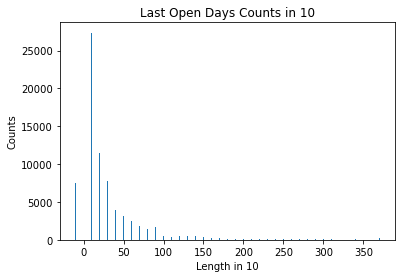

In [31]:
fig, ax = plt.subplots()
ax.bar(last_open_length.index, last_open_length.values)
ax.set_xlabel('Length in 10')
ax.set_ylabel('Counts')
ax.set_title('Last Open Days Counts in 10')

plt.show()

Take a closer look at the shorter length.

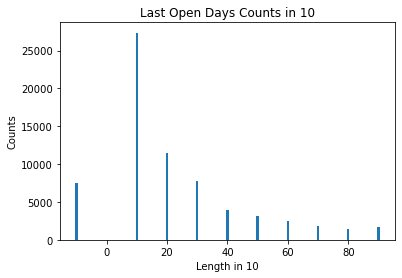

In [32]:
fig, ax = plt.subplots()
ax.bar(last_open_length.index[:10], last_open_length.values[:10])
ax.set_xlabel('Length in 10')
ax.set_ylabel('Counts')
ax.set_title('Last Open Days Counts in 10')

plt.show()

Though we have -20 in the data and this may distort the result(underrated), \
but we can see that over 50% users open at least 1 e-mail in a month.

In [33]:
df.last_login_day.unique()

array(['6', '4', '5', '9', '8', '3', '1', '10', '58', '44', '2', '7',
       '382', '135', '1396', '12', '11', '15', '18', '49', '114', '87',
       '0', '90', '25', '88', '327', '95', '22', '91', '211', '46', '536',
       '198', '14', '113', '299', '32', '107', '116', '147', '13', '65',
       '36', '19', '251', '51', '26', '21', '901', '324', '349', '115',
       '592', '216', '20', '265', '31', '16', '24', '285', '245', '460',
       '45', '379', '106', '178', '86', '60', '310', '418', '27', '29',
       '205', '145', '472', '427', '42', '306', '899', '292', '220',
       '267', '222', '834', '101', '43', '164', '475', '206', '805', '85',
       '38', '838', '719', '832', '362', '30', '281', '53', '208', '527',
       '187', '799', '573', '57', '136', '80', '474', '508', '707', '659',
       '394', '300', '252', '407', '40', '383', '117', '632', '83', '77',
       '679', '200', '693', '662', '503', '356', '17', '188', '336',
       '541', '92', '456', '66', '155', '132', '584', '14

In [34]:
df.last_login_day=df.last_login_day.replace(to_replace="Never login",value=-20)

In [35]:
df.last_login_day

0          6
1          4
2          5
3          9
4          6
        ... 
73534     36
73535     10
73536    -20
73537     34
73538      3
Name: last_login_day, Length: 73539, dtype: object

In [36]:
df.last_login_day = df.last_login_day.apply(int)

In [37]:
df.last_login_day.describe()

count    73539.000000
mean        53.057466
std        344.597989
min        -20.000000
25%          3.000000
50%          8.000000
75%         26.000000
max      18141.000000
Name: last_login_day, dtype: float64

This skewed even more than the open e-mail day,\
and we also winsorize the data over 365 days to be 365.

In [38]:
df.last_login_day[:] = df.last_login_day.apply(lambda x: x if x<365 else 365)

C:\Users\2022080101\AppData\Local\Temp\ipykernel_8148\2895780134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.last_login_day[:] = df.last_login_day.apply(lambda x: x if x<365 else 365)


In [39]:
df.last_login_day.describe()

count    73539.000000
mean        42.062443
std         85.123930
min        -20.000000
25%          3.000000
50%          8.000000
75%         26.000000
max        365.000000
Name: last_login_day, dtype: float64

In [40]:
last_login_length = df.last_login_day.apply(lambda x: round(int((x + 9) / 10) * 10))

In [41]:
last_login_length = last_login_length.value_counts().sort_index()

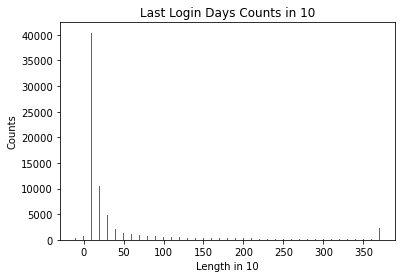

In [42]:
fig, ax = plt.subplots()
ax.bar(last_login_length.index, last_login_length.values)
ax.set_xlabel('Length in 10')
ax.set_ylabel('Counts')
ax.set_title('Last Login Days Counts in 10')

plt.show()

Also, we take a closer look at the shorter login days.

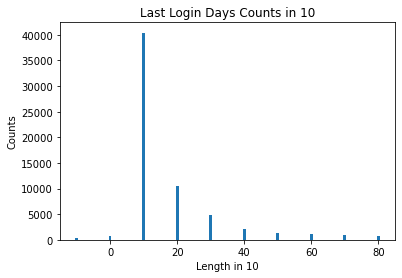

In [43]:
fig, ax = plt.subplots()
ax.bar(last_login_length.index[:10], last_login_length.values[:10])
ax.set_xlabel('Length in 10')
ax.set_ylabel('Counts')
ax.set_title('Last Login Days Counts in 10')

plt.show()

Similar in the case of open e-mail days, over 50% users login at least 1 time in a month.

In [44]:
df.last_checkout_day.unique()

array(['18', '8', '5', '53', '221', '70', '3', '28', '26', '12', '156',
       '2', '7', '86', '57', '23', '9', '6', '49', '16', '468', '1',
       'Never checkout', '139', '128', '40', '22', '13', '4', '21', '60',
       '15', '420', '54', '50', '123', '855', '17', '95', '29', '25',
       '10', '172', '499', '11', '190', '111', '214', '186', '58', '319',
       '76', '1244', '20', '175', '14', '63', '38', '1122', '75', '83',
       '64', '1167', '48', '34', '290', '433', '168', '101', '35', '148',
       '39', '84', '69', '30', '32', '37', '205', '166', '143', '230',
       '19', '1118', '124', '224', '622', '676', '939', '246', '78', '46',
       '118', '61', '62', '1024', '79', '326', '415', '36', '659', '112',
       '107', '47', '272', '434', '31', '41', '142', '243', '27', '283',
       '45', '413', '105', '151', '316', '379', '202', '43', '451', '33',
       '68', '533', '232', '87', '91', '147', '572', '917', '144', '104',
       '59', '403', '67', '187', '306', '700', '184', 

C:\Users\2022080101\AppData\Local\Temp\ipykernel_8148\3075868874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.last_checkout_day[:] = df.last_checkout_day.apply(lambda x: x if x<365 else 365)


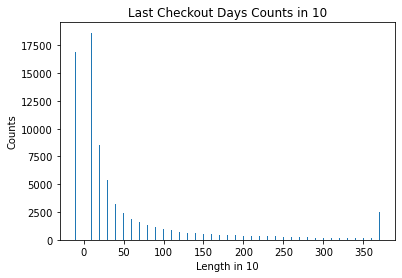

In [45]:
df.last_checkout_day=df.last_checkout_day.replace(to_replace="Never checkout",value=-20)
df.last_checkout_day = df.last_checkout_day.apply(int)
df.last_checkout_day[:] = df.last_checkout_day.apply(lambda x: x if x<365 else 365)
last_checkout_length = df.last_checkout_day.apply(lambda x: round(int((x + 9) / 10) * 10))
last_checkout_length = last_checkout_length.value_counts().sort_index()
fig, ax = plt.subplots()
ax.bar(last_checkout_length.index, last_checkout_length.values)
ax.set_xlabel('Length in 10')
ax.set_ylabel('Counts')
ax.set_title('Last Checkout Days Counts in 10')

plt.show()

In [46]:
last_checkout_length.index[:10]

Int64Index([-10, 10, 20, 30, 40, 50, 60, 70, 80, 90], dtype='int64')

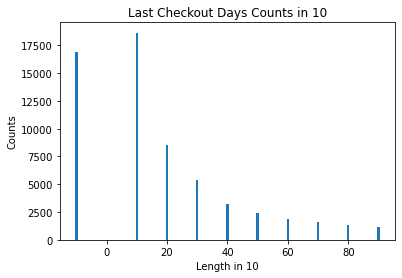

In [47]:
fig, ax = plt.subplots()
ax.bar(last_checkout_length.index[:10], last_checkout_length.values[:10])
ax.set_xlabel('Length in 10')
ax.set_ylabel('Counts')
ax.set_title('Last Checkout Days Counts in 10')

plt.show()

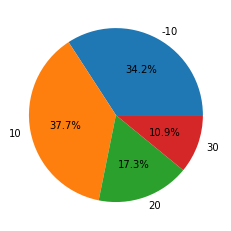

In [48]:
plt.pie(x = (last_checkout_length.values/sum(last_checkout_length.values))[0:4]
        ,labels = last_checkout_length.index[0:4]
        ,autopct='%1.1f%%'); 

There are over 30% of users that never buy anything, and other 65% users buy at least 1 time in a month.

In [49]:
open_last_10_d = df.open_count_last_10_days.value_counts() 

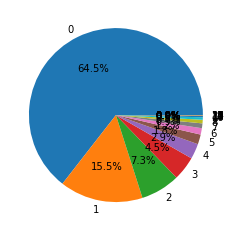

In [50]:
plt.pie(x = open_last_10_d.values
        ,labels = open_last_10_d.index
        ,autopct='%1.1f%%');

There are over 60% of users that does not open e-mail in last 10 days.\
Recall that there are about 30% of users that open at least 1 e-mail in last 10 days.\
Therefore, this two ratios are not disparate.

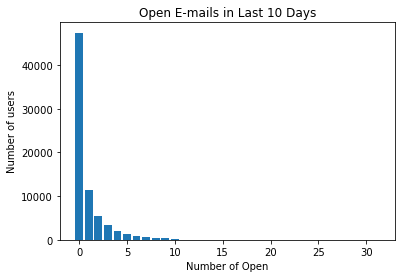

In [51]:
fig, ax = plt.subplots()
ax.bar(open_last_10_d.index, open_last_10_d.values)
ax.set_xlabel('Number of Open')
ax.set_ylabel('Number of users')
ax.set_title('Open E-mails in Last 10 Days')

plt.show()

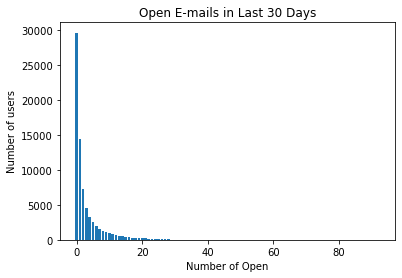

In [52]:
open_last_30_d = df.open_count_last_30_days.value_counts().sort_index()
fig, ax = plt.subplots()
ax.bar(open_last_30_d.index, open_last_30_d.values)
ax.set_xlabel('Number of Open')
ax.set_ylabel('Number of users')
ax.set_title('Open E-mails in Last 30 Days')

plt.show()

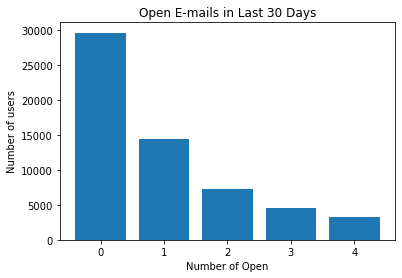

In [53]:
fig, ax = plt.subplots()
ax.bar(open_last_30_d.index[0:5], open_last_30_d.values[0:5])
ax.set_xlabel('Number of Open')
ax.set_ylabel('Number of users')
ax.set_title('Open E-mails in Last 30 Days')

plt.show()

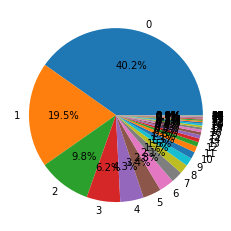

In [54]:
plt.pie(x = open_last_30_d.values
        ,labels = open_last_30_d.index
        ,autopct='%1.1f%%');

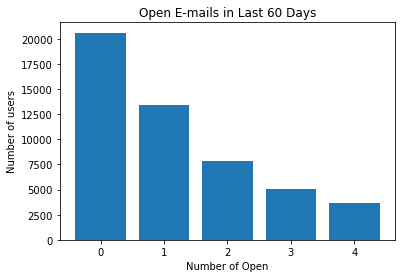

In [55]:
open_last_60_d = df.open_count_last_60_days.value_counts().sort_index()
fig, ax = plt.subplots()
ax.bar(open_last_60_d.index[0:5], open_last_60_d.values[0:5])
ax.set_xlabel('Number of Open')
ax.set_ylabel('Number of users')
ax.set_title('Open E-mails in Last 60 Days')

plt.show()

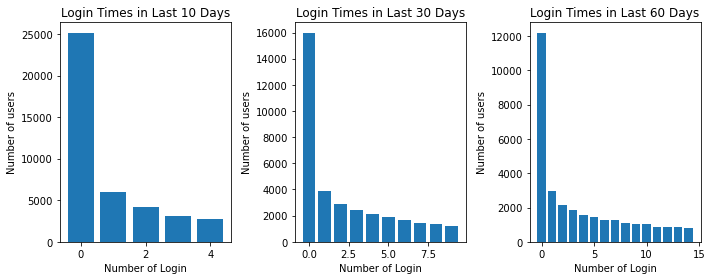

In [56]:
login_last_10_d = df.login_count_last_10_days.value_counts().sort_index()
login_last_30_d = df.login_count_last_30_days.value_counts().sort_index() 
login_last_60_d = df.login_count_last_60_days.value_counts().sort_index() 

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10, 4))
ax1.bar(login_last_10_d.index[0:5], login_last_10_d.values[0:5])
ax1.set_xlabel('Number of Login')
ax1.set_ylabel('Number of users')
ax1.set_title('Login Times in Last 10 Days')


ax2.bar(login_last_30_d.index[0:10], login_last_30_d.values[0:10])
ax2.set_xlabel('Number of Login')
ax2.set_ylabel('Number of users')
ax2.set_title('Login Times in Last 30 Days')


ax3.bar(login_last_60_d.index[0:15], login_last_60_d.values[0:15])
ax3.set_xlabel('Number of Login')
ax3.set_ylabel('Number of users')
ax3.set_title('Login Times in Last 60 Days')

plt.tight_layout()
plt.show()

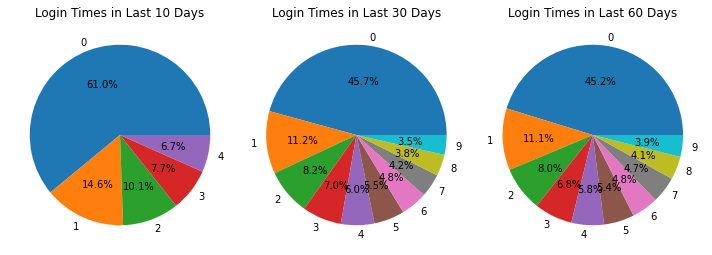

In [57]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10, 4))

ax1.pie(x = login_last_10_d.values[0:5],
        labels = login_last_10_d.index[0:5]
       ,autopct='%1.1f%%')
ax1.set_title('Login Times in Last 10 Days')


ax2.pie(x = login_last_30_d.values[0:10],
        labels = login_last_10_d.index[0:10]
       ,autopct='%1.1f%%')
ax2.set_title('Login Times in Last 30 Days')


ax3.pie(x = login_last_60_d.values[0:10],
        labels = login_last_60_d.index[0:10]
       ,autopct='%1.1f%%')
ax3.set_title('Login Times in Last 60 Days')

plt.tight_layout()
plt.show()

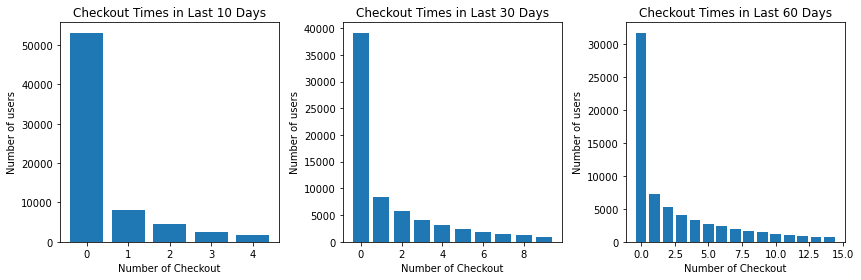

In [58]:
checkout_last_10_d = df.checkout_count_last_10_days.value_counts().sort_index() 
checkout_last_30_d = df.checkout_count_last_30_days.value_counts().sort_index() 
checkout_last_60_d = df.checkout_count_last_60_days.value_counts().sort_index() 

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12, 4))
ax1.bar(checkout_last_10_d.index[0:5], checkout_last_10_d.values[0:5])
ax1.set_xlabel('Number of Checkout')
ax1.set_ylabel('Number of users')
ax1.set_title('Checkout Times in Last 10 Days')


ax2.bar(checkout_last_30_d.index[0:10], checkout_last_30_d.values[0:10])
ax2.set_xlabel('Number of Checkout')
ax2.set_ylabel('Number of users')
ax2.set_title('Checkout Times in Last 30 Days')


ax3.bar(checkout_last_60_d.index[0:15], checkout_last_60_d.values[0:15])
ax3.set_xlabel('Number of Checkout')
ax3.set_ylabel('Number of users')
ax3.set_title('Checkout Times in Last 60 Days')

plt.tight_layout()
plt.show()

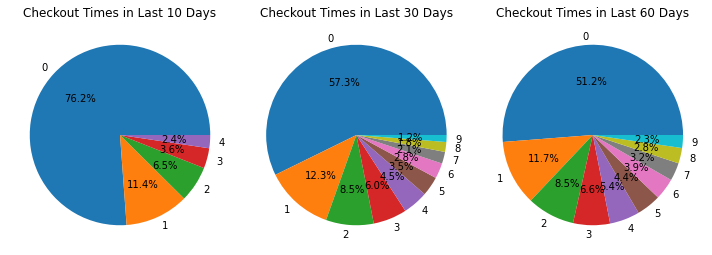

In [59]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10, 4))

ax1.pie(x = checkout_last_10_d.values[0:5],
        labels = checkout_last_10_d.index[0:5]
       ,autopct='%1.1f%%')
ax1.set_title('Checkout Times in Last 10 Days')


ax2.pie(x = checkout_last_30_d.values[0:10],
        labels = checkout_last_10_d.index[0:10]
       ,autopct='%1.1f%%')
ax2.set_title('Checkout Times in Last 30 Days')


ax3.pie(x = checkout_last_60_d.values[0:10],
        labels = checkout_last_60_d.index[0:10]
       ,autopct='%1.1f%%')
ax3.set_title('Checkout Times in Last 60 Days')

plt.tight_layout()
plt.show()

In [60]:
df.open_flag.value_counts()

0    62083
1    11456
Name: open_flag, dtype: int64

# The above is the plot of all variables

# Next, we conduct univariate analysis

We separate the original train data into 2 groups based on open_flag.

In [61]:
open_flag_0 = df[df.open_flag==0]

In [62]:
aaa = open_flag_0.apply(pd.to_numeric, errors='coerce')

In [63]:
open_flag_0.last_open_day.unique()

array([ 19,  14,  49, 227,   5,  13, 163,   7, 130,  27, -20,  28,  12,
         9,  23,  70,  83,  26,  17, 182,  58,   2,  22,  20,  10,   8,
         4,  82,  87,  41, 115, 207,  16,  29,  77,  48,  34, 263,   3,
        25,  30,  21, 180,  91,  90,  47,  64,  61, 365,  78,  86,  32,
        76,  75,  55,  38,  15,  39,  71, 169,  59, 224,  18,  85, 143,
       208,  72, 140,  62,  60, 296, 164, 362, 125,  35, 168,  74,  73,
       154, 210,  46,  36,  33,  53,  69,  37,  93, 221, 233, 347,  42,
       116,  54, 148,  11, 340,  66,  96,  89, 361, 134,  79,  43, 107,
       293, 268,  63, 216,  84, 138, 104,  98, 280, 249,  97, 103, 170,
        57,  40, 301, 246, 267,  81, 297,  51, 306,  44, 230, 174, 108,
       314,  67, 229, 298, 326, 106, 333,  45,  80,  31,  24, 211,  65,
        52,  95, 315,  50, 100, 102, 158, 228, 256, 105,  56, 277, 191,
       244, 137, 181, 203, 234, 295, 279,  88, 175, 288, 173, 290, 183,
       294, 269, 223,  92, 285, 321, 123, 313, 199, 176, 155, 12

In [64]:
open_flag_1 = df[df.open_flag==1]

In [65]:
open_flag_1.last_open_day.unique()

array([  9,   7,   4,  24,   2,   3,   5,   8,  10,  11,  56,  12,  36,
        25,  27,  21,  28,  13,  22,  20,  55, 145,  14, 140,  26,  17,
       148,  19,  31, 174,  18, -20, 226, 365,  15,  29,  54, 153,  60,
        23,   1, 208,  30,   6,  64,  57,  46,  65,  86, 202, 149,  84,
       184,  35,  45,  16,  33,  41,  52, 104,  37,  87,  78,  38,  49,
       193,  42,  59,  77,  62, 160,  47, 139, 221, 286, 180, 155, 191,
       246, 274,  85,  48,  34,  39,  44, 186,  75,  50,  70,  82,  67,
        40,  80,  76,  91,  43,  32,  72, 156,  83, 157, 187, 222,  73,
        53,  81,  69, 335, 123, 257, 134, 127, 126, 100,  90,  89, 109,
       194, 107, 118, 103, 158, 131,  95, 106, 128, 119, 117,  79,  61,
       114,  66, 125,  93,  97, 112, 116, 130,  94, 120, 144, 132,  71,
       137, 113, 133,  68, 269, 212, 138, 333,  98, 164,  58, 129, 115,
       213,  63, 214,  74, 168, 150, 136, 141, 121, 259, 305, 340, 278,
        51, 152, 199, 282, 236, 185, 273, 223, 176, 343, 294, 19

In [66]:
open_flag_0.median()

country_code                       2.0
user_id                        63482.0
subject_line_length               43.0
last_open_day                     15.0
last_login_day                     8.0
last_checkout_day                 12.0
open_count_last_10_days            0.0
open_count_last_30_days            1.0
open_count_last_60_days            1.0
login_count_last_10_days           3.0
login_count_last_30_days          11.0
login_count_last_60_days          22.0
checkout_count_last_10_days        0.0
checkout_count_last_30_days        0.0
checkout_count_last_60_days        1.0
open_flag                          0.0
row_id                         37452.0
dtype: float64

In [67]:
open_flag_1.median()

country_code                       3.0
user_id                        62532.0
subject_line_length               40.0
last_open_day                      3.0
last_login_day                     7.0
last_checkout_day                 12.0
open_count_last_10_days            2.0
open_count_last_30_days            7.0
open_count_last_60_days           11.0
login_count_last_10_days           4.0
login_count_last_30_days          13.0
login_count_last_60_days          25.0
checkout_count_last_10_days        0.0
checkout_count_last_30_days        0.0
checkout_count_last_60_days        1.0
open_flag                          1.0
row_id                         32438.5
dtype: float64

In [68]:
import scipy.stats as ss

In [69]:
variables = ['last_open_day',
             'last_login_day',
             'last_checkout_day',
             'open_count_last_10_days',
             'open_count_last_30_days',
             'open_count_last_60_days',
             'login_count_last_10_days',
             'login_count_last_30_days',
             'login_count_last_60_days',
             'checkout_count_last_10_days',
             'checkout_count_last_30_days',
             'checkout_count_last_60_days']

In [70]:
bb=[]
for i in variables:
    data1=open_flag_0[i]
    data2=open_flag_1[i]
    cnt1=data1.count()
    cnt2=data2.count()
    median1=data1.median()
    median2=data2.median()
    stat, p= ss.ranksums(data1,data2)
    bb.append([i,cnt1,cnt2,median1,median2,stat.round(3),p.round(5)])

In [71]:
bb

[['last_open_day', 62083, 11456, 15.0, 3.0, 68.309, 0.0],
 ['last_login_day', 62083, 11456, 8.0, 7.0, 8.961, 0.0],
 ['last_checkout_day', 62083, 11456, 12.0, 12.0, -2.751, 0.00594],
 ['open_count_last_10_days', 62083, 11456, 0.0, 2.0, -106.803, 0.0],
 ['open_count_last_30_days', 62083, 11456, 1.0, 7.0, -109.599, 0.0],
 ['open_count_last_60_days', 62083, 11456, 1.0, 11.0, -105.416, 0.0],
 ['login_count_last_10_days', 62083, 11456, 3.0, 4.0, -8.309, 0.0],
 ['login_count_last_30_days', 62083, 11456, 11.0, 13.0, -5.851, 0.0],
 ['login_count_last_60_days', 62083, 11456, 22.0, 25.0, -5.139, 0.0],
 ['checkout_count_last_10_days', 62083, 11456, 0.0, 0.0, -3.667, 0.00024],
 ['checkout_count_last_30_days', 62083, 11456, 0.0, 0.0, -4.069, 5e-05],
 ['checkout_count_last_60_days', 62083, 11456, 1.0, 1.0, -4.16, 3e-05]]

In [72]:
result = pd.DataFrame(bb)

In [73]:
result.columns=['衡量變數','沒開信使用者筆數','有開信使用者筆數','沒開信使用者中位數','有開信使用者中位數','ranksums統計值','p值']

In [74]:
result['中位數差異']=result['沒開信使用者中位數'].sub(result['有開信使用者中位數'])

In [75]:
result.head(5)

,衡量變數,沒開信使用者筆數,有開信使用者筆數,沒開信使用者中位數,有開信使用者中位數,ranksums統計值,p值,中位數差異
0,last_open_day,62083,11456,15.0,3.0,68.309,0.00000,12.0
1,last_login_day,62083,11456,8.0,7.0,8.961,0.00000,1.0
2,last_checkout_day,62083,11456,12.0,12.0,-2.751,0.00594,0.0
3,open_count_last_10_days,62083,11456,0.0,2.0,-106.803,0.00000,-2.0
4,open_count_last_30_days,62083,11456,1.0,7.0,-109.599,0.00000,-6.0


In [76]:
result['統計值方向']=result['中位數差異'].apply(lambda x: '+' if x>=0 else '-')

In [77]:
result.head(5)

,衡量變數,沒開信使用者筆數,有開信使用者筆數,沒開信使用者中位數,有開信使用者中位數,ranksums統計值,p值,中位數差異,統計值方向
0,last_open_day,62083,11456,15.0,3.0,68.309,0.00000,12.0,+
1,last_login_day,62083,11456,8.0,7.0,8.961,0.00000,1.0,+
2,last_checkout_day,62083,11456,12.0,12.0,-2.751,0.00594,0.0,+
3,open_count_last_10_days,62083,11456,0.0,2.0,-106.803,0.00000,-2.0,-
4,open_count_last_30_days,62083,11456,1.0,7.0,-109.599,0.00000,-6.0,-


In [78]:
def f(x):
    '''
    作為顯著性程度之區分函數。
    '''
    if x <= 0.001:
        return '***'
    elif x <=0.005:
        return '**'
    elif x <=0.01:
        return '*'
    else:
        return ''


In [79]:
result['顯著性']=result['p值'].apply(lambda x:f(x))

In [80]:
result

,衡量變數,沒開信使用者筆數,有開信使用者筆數,沒開信使用者中位數,有開信使用者中位數,ranksums統計值,p值,中位數差異,統計值方向,顯著性
0,last_open_day,62083,11456,15.0,3.0,68.309,0.00000,12.0,+,***
1,last_login_day,62083,11456,8.0,7.0,8.961,0.00000,1.0,+,***
2,last_checkout_day,62083,11456,12.0,12.0,-2.751,0.00594,0.0,+,*
3,open_count_last_10_days,62083,11456,0.0,2.0,-106.803,0.00000,-2.0,-,***
4,open_count_last_30_days,62083,11456,1.0,7.0,-109.599,0.00000,-6.0,-,***
5,open_count_last_60_days,62083,11456,1.0,11.0,-105.416,0.00000,-10.0,-,***
6,login_count_last_10_days,62083,11456,3.0,4.0,-8.309,0.00000,-1.0,-,***
7,login_count_last_30_days,62083,11456,11.0,13.0,-5.851,0.00000,-2.0,-,***
8,login_count_last_60_days,62083,11456,22.0,25.0,-5.139,0.00000,-3.0,-,***
9,checkout_count_last_10_days,62083,11456,0.0,0.0,-3.667,0.00024,0.0,+,***


# Analysis of Correlation

In [81]:
corr=df[variables].corr(method='spearman')

In [82]:
corr

,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days
last_open_day,1.000000,0.040300,0.090518,-0.500288,-0.438401,-0.325674,-0.009049,-0.010462,0.031944,0.002367,-0.005693,0.023670
last_login_day,0.040300,1.000000,0.072103,-0.055891,-0.039509,-0.027038,-0.783852,-0.765498,-0.739351,-0.595775,-0.637837,-0.642705
last_checkout_day,0.090518,0.072103,1.000000,0.023098,0.047487,0.065584,-0.078638,-0.045600,0.004384,-0.259662,-0.161688,-0.063068
open_count_last_10_days,-0.500288,-0.055891,0.023098,1.000000,0.770287,0.684054,0.066345,0.055958,0.055403,0.043825,0.047606,0.050852
open_count_last_30_days,-0.438401,-0.039509,0.047487,0.770287,1.000000,0.893450,0.052025,0.049311,0.059818,0.027888,0.040517,0.054953
open_count_last_60_days,-0.325674,-0.027038,0.065584,0.684054,0.893450,1.000000,0.044895,0.037112,0.061576,0.024251,0.030358,0.057197
login_count_last_10_days,-0.009049,-0.783852,-0.078638,0.066345,0.052025,0.044895,1.000000,0.926041,0.885470,0.639444,0.713598,0.717663
login_count_last_30_days,-0.010462,-0.765498,-0.045600,0.055958,0.049311,0.037112,0.926041,1.000000,0.961219,0.570577,0.751349,0.771592
login_count_last_60_days,0.031944,-0.739351,0.004384,0.055403,0.059818,0.061576,0.885470,0.961219,1.000000,0.541986,0.708222,0.794686
checkout_count_last_10_days,0.002367,-0.595775,-0.259662,0.043825,0.027888,0.024251,0.639444,0.570577,0.541986,1.000000,0.754583,0.680279


In [83]:
corr.style.background_gradient().set_precision(2)

,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days
last_open_day,1.00,0.04,0.09,-0.50,-0.44,-0.33,-0.01,-0.01,0.03,0.00,-0.01,0.02
last_login_day,0.04,1.00,0.07,-0.06,-0.04,-0.03,-0.78,-0.77,-0.74,-0.60,-0.64,-0.64
last_checkout_day,0.09,0.07,1.00,0.02,0.05,0.07,-0.08,-0.05,0.00,-0.26,-0.16,-0.06
open_count_last_10_days,-0.50,-0.06,0.02,1.00,0.77,0.68,0.07,0.06,0.06,0.04,0.05,0.05
open_count_last_30_days,-0.44,-0.04,0.05,0.77,1.00,0.89,0.05,0.05,0.06,0.03,0.04,0.05
open_count_last_60_days,-0.33,-0.03,0.07,0.68,0.89,1.00,0.04,0.04,0.06,0.02,0.03,0.06
login_count_last_10_days,-0.01,-0.78,-0.08,0.07,0.05,0.04,1.00,0.93,0.89,0.64,0.71,0.72
login_count_last_30_days,-0.01,-0.77,-0.05,0.06,0.05,0.04,0.93,1.00,0.96,0.57,0.75,0.77
login_count_last_60_days,0.03,-0.74,0.00,0.06,0.06,0.06,0.89,0.96,1.00,0.54,0.71,0.79
checkout_count_last_10_days,0.00,-0.60,-0.26,0.04,0.03,0.02,0.64,0.57,0.54,1.00,0.75,0.68


From the outcome above, we see that login_count has high correlation with checkout_count.\
And e-mail related variables have low correlation with other non-e-mail- related variables.

# Univariate T-test and Pearson correlation

In [84]:
zz=[]
for i in variables:
    aa=df[i].quantile(q=[0,0.001,0.01,0.02,0.03,0.1,0.5,0.9,0.97,0.98,0.99,0.999,1])    
    ab=aa.to_list()
    ac=df[i].skew()
    bb=[i]+ab+[ac]
    zz.append(bb)

In [85]:
qtile=pd.DataFrame(zz)

In [86]:
qtile.columns=['衡量變數','min','p_0.001','p_0.01','p_0.02','p_0.03','p_0.1','p_0.5','p_0.9','p_0.97','p_0.98','p_0.99','p_0.999','max','skew']

In [87]:
qtile

,衡量變數,min,p_0.001,p_0.01,p_0.02,p_0.03,p_0.1,p_0.5,p_0.9,p_0.97,p_0.98,p_0.99,p_0.999,max,skew
0,last_open_day,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,12.0,75.0,149.0,183.0,268.00,365.000,365.0,3.393725
1,last_login_day,-20.0,-20.0,0.0,1.0,1.0,1.0,8.0,140.0,365.0,365.0,365.00,365.000,365.0,2.729871
2,last_checkout_day,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,12.0,170.0,365.0,365.0,365.00,365.000,365.0,2.211257
3,open_count_last_10_days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,8.00,11.000,31.0,2.786152
4,open_count_last_30_days,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,16.0,18.0,22.00,29.000,92.0,2.771019
5,open_count_last_60_days,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,27.0,32.0,38.00,53.000,135.0,2.808588
6,login_count_last_10_days,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.0,41.0,48.0,62.00,120.000,254.0,3.599801
7,login_count_last_30_days,0.0,0.0,0.0,0.0,0.0,0.0,11.0,67.0,116.0,137.0,176.62,341.000,735.0,3.523943
8,login_count_last_60_days,0.0,0.0,0.0,0.0,0.0,0.0,22.0,128.0,222.0,262.0,336.00,633.462,1260.0,3.474175
9,checkout_count_last_10_days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0,11.00,33.000,157.0,13.125030


Since outliers may swell up the variance and make t-test incorrectly significant, \
we try to winsorize data and see the result.

## Rule of winsorization: [min,max]
1.right-skewed:[p_0.02, p_0.97] \
2.left-skewed:[p_0.03, p_0.98]

In [88]:
def bound(qtile):
    qtile['lb']=np.nan
    qtile['ub']=np.nan
    for i in range(len(qtile.index)):
        if (qtile['skew'][i]>=4):
            qtile['lb'][i]=qtile['p_0.02'][i]
            qtile['ub'][i]=qtile['p_0.97'][i]
        else:
            qtile['lb'][i]=qtile['p_0.03'][i]
            qtile['ub'][i]=qtile['p_0.98'][i]

In [89]:
bound(qtile)

C:\Users\2022080101\AppData\Local\Temp\ipykernel_8148\1875694522.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qtile['lb'][i]=qtile['p_0.03'][i]
C:\Users\2022080101\AppData\Local\Temp\ipykernel_8148\1875694522.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qtile['ub'][i]=qtile['p_0.98'][i]
C:\Users\2022080101\AppData\Local\Temp\ipykernel_8148\1875694522.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qtile['lb'][i]=qtil

In [90]:
qtile.round(2)

,衡量變數,min,p_0.001,p_0.01,p_0.02,p_0.03,p_0.1,p_0.5,p_0.9,p_0.97,p_0.98,p_0.99,p_0.999,max,skew,lb,ub
0,last_open_day,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,12.0,75.0,149.0,183.0,268.00,365.00,365.0,3.39,-20.0,183.0
1,last_login_day,-20.0,-20.0,0.0,1.0,1.0,1.0,8.0,140.0,365.0,365.0,365.00,365.00,365.0,2.73,1.0,365.0
2,last_checkout_day,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,12.0,170.0,365.0,365.0,365.00,365.00,365.0,2.21,-20.0,365.0
3,open_count_last_10_days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,8.00,11.00,31.0,2.79,0.0,7.0
4,open_count_last_30_days,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,16.0,18.0,22.00,29.00,92.0,2.77,0.0,18.0
5,open_count_last_60_days,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,27.0,32.0,38.00,53.00,135.0,2.81,0.0,32.0
6,login_count_last_10_days,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.0,41.0,48.0,62.00,120.00,254.0,3.60,0.0,48.0
7,login_count_last_30_days,0.0,0.0,0.0,0.0,0.0,0.0,11.0,67.0,116.0,137.0,176.62,341.00,735.0,3.52,0.0,137.0
8,login_count_last_60_days,0.0,0.0,0.0,0.0,0.0,0.0,22.0,128.0,222.0,262.0,336.00,633.46,1260.0,3.47,0.0,262.0
9,checkout_count_last_10_days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0,11.00,33.00,157.0,13.13,0.0,6.0


In [91]:
winsor_data = df

In [92]:
qtile.loc[0,'lb']

-20.0

In [93]:
count = 0
for i in variables:
    b1=winsor_data[i]
    b21=np.where(b1<qtile.loc[count,'lb'],qtile.loc[count,'lb'],b1)
    b22=np.where(b21>qtile.loc[count,'ub'],qtile.loc[count,'ub'],b21)
    count += 1
    winsor_data[i]=pd.DataFrame(b22)   

In [94]:
winsor_data

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19.0,6.0,18.0,0.0,2.0,4.0,12.0,43.0,99.0,0.0,5.0,10.0,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9.0,4.0,8.0,2.0,9.0,17.0,18.0,48.0,90.0,1.0,1.0,4.0,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14.0,5.0,5.0,0.0,4.0,12.0,24.0,69.0,119.0,5.0,17.0,27.0,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49.0,9.0,53.0,0.0,0.0,1.0,9.0,23.0,69.0,1.0,3.0,6.0,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,183.0,6.0,221.0,0.0,0.0,0.0,2.0,5.0,5.0,0.0,0.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24.0,36.0,279.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,73534
73535,2,2019-09-02 00:00:00+08:00,127620,38,46.0,10.0,51.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,73535
73536,2,2019-09-02 00:00:00+08:00,127696,32,-20.0,1.0,-20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,73536
73537,2,2019-09-02 00:00:00+08:00,127807,38,5.0,34.0,-20.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73537


In [95]:
bb=[]
for i in variables:
    data1=winsor_data[i][winsor_data.open_flag ==0]
    data2=winsor_data[i][winsor_data.open_flag ==1]
    cnt1=data1.count()
    cnt2=data2.count()
    median1=data1.median()
    median2=data2.median()
    mean1=data1.mean()
    mean2=data2.mean()
    std1=data1.std()
    std2=data2.std()
    modified_std1=np.sqrt(cnt1/(cnt1-1))*std1
    modified_std2=np.sqrt(cnt2/(cnt2-1))*std2
    stat, p= ss.ttest_ind_from_stats(mean1=mean1,std1=modified_std1,nobs1=cnt1,
                                    mean2=mean2,std2=modified_std2,nobs2=cnt2)
    bb.append([i,cnt1,cnt2,median1,median2,mean1,mean2,stat.round(3),p.round(5)])

In [96]:
winsor_result = pd.DataFrame(bb)

In [97]:
winsor_result.columns=['衡量變數','沒開信使用者筆數','有開信使用者筆數',
                       '沒開信使用者中位數','有開信使用者中位數',
                       '沒開信使用者平均數','有開信使用者平均數','T統計值','p值']

In [98]:
winsor_result

,衡量變數,沒開信使用者筆數,有開信使用者筆數,沒開信使用者中位數,有開信使用者中位數,沒開信使用者平均數,有開信使用者平均數,T統計值,p值
0,last_open_day,62083,11456,15.0,3.0,27.806501,9.400925,45.317,0.00000
1,last_login_day,62083,11456,8.0,7.0,42.326740,41.212902,1.288,0.19789
2,last_checkout_day,62083,11456,12.0,12.0,45.950067,46.502706,-0.594,0.55252
3,open_count_last_10_days,62083,11456,0.0,2.0,0.518789,2.842004,-166.298,0.00000
4,open_count_last_30_days,62083,11456,1.0,7.0,1.767489,7.665590,-163.280,0.00000
5,open_count_last_60_days,62083,11456,1.0,11.0,3.365656,12.952689,-150.625,0.00000
6,login_count_last_10_days,62083,11456,3.0,4.0,7.834721,8.476432,-5.695,0.00000
7,login_count_last_30_days,62083,11456,11.0,13.0,23.827247,25.248167,-4.448,0.00001
8,login_count_last_60_days,62083,11456,22.0,25.0,46.342622,48.588949,-3.694,0.00022
9,checkout_count_last_10_days,62083,11456,0.0,0.0,0.710178,0.773045,-4.155,0.00003


After winsorizing the data, we can see that \
`last_checkout_day` and `checkout_count_last_60_days` are not statistically significant.

In [99]:
winsor_result['中位數差異']=winsor_result['沒開信使用者中位數']-winsor_result['有開信使用者中位數']

In [100]:
winsor_result['統計值方向']=winsor_result['中位數差異'].apply(lambda x: '+' if x>=0 else '-')

In [101]:
winsor_result

,衡量變數,沒開信使用者筆數,有開信使用者筆數,沒開信使用者中位數,有開信使用者中位數,沒開信使用者平均數,有開信使用者平均數,T統計值,p值,中位數差異,統計值方向
0,last_open_day,62083,11456,15.0,3.0,27.806501,9.400925,45.317,0.00000,12.0,+
1,last_login_day,62083,11456,8.0,7.0,42.326740,41.212902,1.288,0.19789,1.0,+
2,last_checkout_day,62083,11456,12.0,12.0,45.950067,46.502706,-0.594,0.55252,0.0,+
3,open_count_last_10_days,62083,11456,0.0,2.0,0.518789,2.842004,-166.298,0.00000,-2.0,-
4,open_count_last_30_days,62083,11456,1.0,7.0,1.767489,7.665590,-163.280,0.00000,-6.0,-
5,open_count_last_60_days,62083,11456,1.0,11.0,3.365656,12.952689,-150.625,0.00000,-10.0,-
6,login_count_last_10_days,62083,11456,3.0,4.0,7.834721,8.476432,-5.695,0.00000,-1.0,-
7,login_count_last_30_days,62083,11456,11.0,13.0,23.827247,25.248167,-4.448,0.00001,-2.0,-
8,login_count_last_60_days,62083,11456,22.0,25.0,46.342622,48.588949,-3.694,0.00022,-3.0,-
9,checkout_count_last_10_days,62083,11456,0.0,0.0,0.710178,0.773045,-4.155,0.00003,0.0,+


In [102]:
def f(x):
    if x <= 0.001:
        return '***'
    elif x <=0.005:
        return '**'
    elif x <=0.01:
        return '*'
    else:
        return ''

In [103]:
winsor_result['顯著性']=winsor_result['p值'].apply(lambda x:f(x))

In [104]:
winsor_result

,衡量變數,沒開信使用者筆數,有開信使用者筆數,沒開信使用者中位數,有開信使用者中位數,沒開信使用者平均數,有開信使用者平均數,T統計值,p值,中位數差異,統計值方向,顯著性
0,last_open_day,62083,11456,15.0,3.0,27.806501,9.400925,45.317,0.00000,12.0,+,***
1,last_login_day,62083,11456,8.0,7.0,42.326740,41.212902,1.288,0.19789,1.0,+,
2,last_checkout_day,62083,11456,12.0,12.0,45.950067,46.502706,-0.594,0.55252,0.0,+,
3,open_count_last_10_days,62083,11456,0.0,2.0,0.518789,2.842004,-166.298,0.00000,-2.0,-,***
4,open_count_last_30_days,62083,11456,1.0,7.0,1.767489,7.665590,-163.280,0.00000,-6.0,-,***
5,open_count_last_60_days,62083,11456,1.0,11.0,3.365656,12.952689,-150.625,0.00000,-10.0,-,***
6,login_count_last_10_days,62083,11456,3.0,4.0,7.834721,8.476432,-5.695,0.00000,-1.0,-,***
7,login_count_last_30_days,62083,11456,11.0,13.0,23.827247,25.248167,-4.448,0.00001,-2.0,-,***
8,login_count_last_60_days,62083,11456,22.0,25.0,46.342622,48.588949,-3.694,0.00022,-3.0,-,***
9,checkout_count_last_10_days,62083,11456,0.0,0.0,0.710178,0.773045,-4.155,0.00003,0.0,+,***


In [105]:
corr_profit=winsor_data[variables].corr(method='pearson')

In [106]:
corr_profit.style.background_gradient().set_precision(3)

,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days
last_open_day,1.000,0.049,0.072,-0.271,-0.292,-0.275,0.004,0.009,0.029,0.005,0.004,0.020
last_login_day,0.049,1.000,0.225,-0.021,-0.014,-0.008,-0.317,-0.334,-0.337,-0.223,-0.259,-0.271
last_checkout_day,0.072,0.225,1.000,-0.003,0.007,0.015,-0.214,-0.220,-0.211,-0.204,-0.225,-0.224
open_count_last_10_days,-0.271,-0.021,-0.003,1.000,0.869,0.785,0.050,0.047,0.044,0.036,0.035,0.033
open_count_last_30_days,-0.292,-0.014,0.007,0.869,1.000,0.936,0.041,0.047,0.048,0.026,0.033,0.037
open_count_last_60_days,-0.275,-0.008,0.015,0.785,0.936,1.000,0.039,0.044,0.054,0.027,0.031,0.042
login_count_last_10_days,0.004,-0.317,-0.214,0.050,0.041,0.039,1.000,0.933,0.885,0.581,0.593,0.577
login_count_last_30_days,0.009,-0.334,-0.220,0.047,0.047,0.044,0.933,1.000,0.961,0.513,0.626,0.624
login_count_last_60_days,0.029,-0.337,-0.211,0.044,0.048,0.054,0.885,0.961,1.000,0.485,0.590,0.646
checkout_count_last_10_days,0.005,-0.223,-0.204,0.036,0.026,0.027,0.581,0.513,0.485,1.000,0.803,0.728


After winsorizing the data, the correlation of login_count and checkout_count are still high,\
and the correlation between e-mail and other non-open-e-mail behavior are still low.

# A/B testing

We use `test.csv` to be the sample data for the A/B test.

Test variable: subject_line_length
Target : Open_flag、checkout_count_last_[10/30/60]_days

## Since I can not actually conduct A/B test to Shopee users, <br>
## I rather make assumptions of A/B test as follows:

We use `subject_line_length` to see whether it affects the number of purchases of user. \
The way how we do that is we assume the the users receive e-mail with `subject_line_length` <= 40 as 1 group, \
the others receive e-mail with `subject_line_length` longer than 40 as another group. \
Every other things remain the same, and under the adaquate testing time span, \
we see the result of numbers of purchases of each group and give a conclusion of this test. 

In [107]:
test_data = pd.read_csv(path+'/'+file[1])

In [108]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55970 entries, 0 to 55969
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 55970 non-null  int64 
 1   grass_date                   55970 non-null  object
 2   user_id                      55970 non-null  int64 
 3   subject_line_length          55970 non-null  int64 
 4   last_open_day                55970 non-null  object
 5   last_login_day               55970 non-null  object
 6   last_checkout_day            55970 non-null  object
 7   open_count_last_10_days      55970 non-null  int64 
 8   open_count_last_30_days      55970 non-null  int64 
 9   open_count_last_60_days      55970 non-null  int64 
 10  login_count_last_10_days     55970 non-null  int64 
 11  login_count_last_30_days     55970 non-null  int64 
 12  login_count_last_60_days     55970 non-null  int64 
 13  checkout_count_last_10_days  55

In [109]:
subject_length_test = test_data.subject_line_length.apply(lambda x: round(int((x + 9) / 10) * 10))

In [110]:
subject_length_test.value_counts()

50    19650
40    17900
60     5869
30     5848
70     2829
80     2084
20     1790
Name: subject_line_length, dtype: int64

In [111]:
train_group_1 = df.loc[df.subject_line_length <=40,:]

In [112]:
train_group_2 = df.loc[df.subject_line_length >40,:]

In [113]:
train_group_1.checkout_count_last_10_days.describe()

count    31678.000000
mean         0.728676
std          1.467766
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: checkout_count_last_10_days, dtype: float64

In [114]:
train_group_2.checkout_count_last_10_days.describe()

count    41861.000000
mean         0.713385
std          1.503024
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: checkout_count_last_10_days, dtype: float64

In [115]:
test_group_1 = test_data.loc[test_data.subject_line_length <=40,:]

In [116]:
test_group_2 = test_data.loc[test_data.subject_line_length >40,:]

In [117]:
test_group_1.checkout_count_last_10_days.describe()

count    25538.000000
mean         1.083914
std          3.059481
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        222.000000
Name: checkout_count_last_10_days, dtype: float64

In [118]:
test_group_2.checkout_count_last_10_days.describe()

count    30432.000000
mean         1.158879
std          3.831679
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        252.000000
Name: checkout_count_last_10_days, dtype: float64

In [119]:
(test_group_1.checkout_count_last_10_days > 100).sum()

1

In [120]:
(test_group_2.checkout_count_last_10_days > 100).sum()

3

In [121]:
import scipy.stats as stats

Test1 : use t-test to test about \
$\mu_1 := \text{mean of last check out number of 10 days with subject line length <=40 in train data}$\
$\mu_2 := \text{mean of last check out number of 10 days with subject line length <=40 in test data}$

Null hypothesis $H_0$ : $\mu_1 < \mu_2$ \
Alternative hypothesis $H_1$ : $\mu_1 \ge \mu_2$ \
confidence level : 95% i.e. $\alpha = 0.05$ \
And we do the same test about groups of subject line length > 40.\
Note that we first assume that the variances are equal. (we'll test later)

In [122]:
stats.ttest_ind(a=train_group_1.checkout_count_last_10_days, 
                b=test_group_1.checkout_count_last_10_days, 
                equal_var=True,
               alternative='less')

Ttest_indResult(statistic=-18.227077334225363, pvalue=2.5513112677034304e-74)

In [123]:
stats.ttest_ind(a=train_group_2.checkout_count_last_10_days, 
                b=test_group_2.checkout_count_last_10_days, 
                equal_var=True,
               alternative='less')

Ttest_indResult(statistic=-21.6106816390112, pvalue=1.515107393549514e-103)

It seems like we reject the null hypothesis.\
But what if we drop the outliers and doing the same test?

For simplicity, we see 50 and more as outliers.

In [124]:
train_group_1_less_50 = train_group_1.loc[train_group_1.checkout_count_last_10_days<50,:]

In [125]:
train_group_2_less_50 = train_group_2.loc[train_group_2.checkout_count_last_10_days<50,:]

In [126]:
test_group_1_less_50 = test_group_1.loc[test_group_1.checkout_count_last_10_days<50,:]
test_group_2_less_50 = test_group_2.loc[test_group_2.checkout_count_last_10_days<50,:]

In [127]:
stats.ttest_ind(a=train_group_1_less_50.checkout_count_last_10_days, 
                b=test_group_1_less_50.checkout_count_last_10_days, 
                equal_var=True,
               alternative='less')

Ttest_indResult(statistic=-19.3549700940459, pvalue=1.7099372024762207e-83)

In [128]:
stats.ttest_ind(a=train_group_2_less_50.checkout_count_last_10_days, 
                b=test_group_2_less_50.checkout_count_last_10_days, 
                equal_var=True,
               alternative='less')

Ttest_indResult(statistic=-23.22502336073413, pvalue=3.4762728239718304e-119)

Next, we test about the equalness of 2 variances.

In [129]:
stats.bartlett(train_group_1.checkout_count_last_10_days,
               test_group_1.checkout_count_last_10_days)

BartlettResult(statistic=14749.413915847676, pvalue=0.0)

In [130]:
stats.bartlett(train_group_2.checkout_count_last_10_days,
               test_group_2.checkout_count_last_10_days)

BartlettResult(statistic=29677.022710602272, pvalue=0.0)

Also, we drop the outliers and doing the same test

In [131]:
stats.bartlett(train_group_1_less_50.checkout_count_last_10_days,
               test_group_1_less_50.checkout_count_last_10_days)

BartlettResult(statistic=9382.236487810982, pvalue=0.0)

In [132]:
stats.bartlett(train_group_2_less_50.checkout_count_last_10_days,
               test_group_2_less_50.checkout_count_last_10_days)

BartlettResult(statistic=16010.379569495673, pvalue=0.0)

Variance test shows that the 2 variances between train and test data are the same,\
and hence the above test of 2 mean holds.

Though we drop the outliers, we still reject the null hypothesis.\
The longer of subject line does not significantly increase the purchase number of Shopee users.

# Create Dashboard

There may be some metric we have interest in, including
* the ratio of purchase and login number.

We create dashboard for this ratio by `plotly` and `dash`.

In [133]:
#!pip install plotly==4.14.3 > log.txt
#!pip install jupyter-dash > log.txt

In [134]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from dash import Dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output

We separate user into 3 groups: 
1. Buying frequently (equal or more than 5 times in last 10 days)
2. Buying often (more than 2 times but less than 5 times in last 10 days)
3. seldom buying(equal or less than 2 times in last 10 days)

We monitor the ratio of purchase and login number in 3 groups to see the outcome.

In [135]:
df.query("checkout_count_last_10_days >= 5")

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
2,6,2019-07-16 00:00:00+08:00,177,49,14.0,5.0,5.0,0.0,4.0,12.0,24.0,69.0,119.0,5.0,17.0,27.0,0,2
15,6,2019-07-16 00:00:00+08:00,663,49,4.0,2.0,2.0,7.0,18.0,32.0,18.0,40.0,68.0,6.0,9.0,14.0,1,15
18,5,2019-07-16 00:00:00+08:00,740,43,28.0,1.0,3.0,0.0,0.0,0.0,16.0,54.0,93.0,5.0,12.0,24.0,0,18
19,5,2019-07-16 00:00:00+08:00,749,43,12.0,1.0,2.0,0.0,0.0,0.0,18.0,43.0,93.0,6.0,12.0,16.0,0,19
42,4,2019-07-16 00:00:00+08:00,2076,44,10.0,3.0,5.0,1.0,7.0,10.0,48.0,137.0,262.0,6.0,17.0,31.0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73342,1,2019-09-02 00:00:00+08:00,121854,33,20.0,1.0,1.0,0.0,0.0,0.0,48.0,137.0,164.0,6.0,15.0,15.0,0,73342
73368,3,2019-09-02 00:00:00+08:00,122208,64,-20.0,1.0,1.0,0.0,0.0,0.0,13.0,24.0,24.0,6.0,17.0,24.0,0,73368
73377,1,2019-09-02 00:00:00+08:00,122327,33,1.0,1.0,1.0,5.0,5.0,5.0,17.0,28.0,28.0,6.0,10.0,10.0,1,73377
73406,3,2019-09-02 00:00:00+08:00,122726,49,-20.0,1.0,1.0,0.0,0.0,0.0,10.0,34.0,34.0,5.0,6.0,6.0,0,73406


In [136]:
df3 = df.query("checkout_count_last_10_days >= 5")

In [137]:
cond = df3['login_count_last_10_days'].le(0)

In [138]:
cond

2        False
15       False
18       False
19       False
42       False
         ...  
73342    False
73368    False
73377    False
73406    False
73454    False
Name: login_count_last_10_days, Length: 3814, dtype: bool

In [139]:
df3['purchase/login_ratio'] = df3.checkout_count_last_10_days.div(
                                    df3.login_count_last_10_days.mask(cond,np.inf))

C:\Users\2022080101\AppData\Local\Temp\ipykernel_8148\2930692321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['purchase/login_ratio'] = df3.checkout_count_last_10_days.div(


In [140]:
df3['purchase/login_ratio'].describe()

count    3814.000000
mean        0.304404
std         0.225708
min         0.104167
25%         0.162162
50%         0.240000
75%         0.375000
max         5.000000
Name: purchase/login_ratio, dtype: float64

In [141]:
df3['purchase/login_ratio'].mean()

0.3044042238205343

In [142]:
df4 = df.query("checkout_count_last_10_days < 5 and checkout_count_last_10_days >= 2")

In [143]:
cond2 = df4['login_count_last_10_days'].le(0)
df4['purchase/login_ratio'] = df4.checkout_count_last_10_days.div(
                                    df4.login_count_last_10_days.mask(cond2,np.inf))

C:\Users\2022080101\AppData\Local\Temp\ipykernel_8148\2199150282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['purchase/login_ratio'] = df4.checkout_count_last_10_days.div(


In [144]:
df4['purchase/login_ratio'].describe()

count    8664.000000
mean        0.219339
std         0.232399
min         0.000000
25%         0.105263
50%         0.166667
75%         0.250000
max         4.000000
Name: purchase/login_ratio, dtype: float64

In [145]:
df5 = df.query("checkout_count_last_10_days < 2")

In [146]:
cond3 = df5['login_count_last_10_days'].le(0)
df5['purchase/login_ratio'] = df5.checkout_count_last_10_days.div(
                                    df5.login_count_last_10_days.mask(cond3,np.inf))

C:\Users\2022080101\AppData\Local\Temp\ipykernel_8148\3976898148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['purchase/login_ratio'] = df5.checkout_count_last_10_days.div(


In [147]:
df5['purchase/login_ratio'].describe()

count    61061.000000
mean         0.018215
std          0.074137
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: purchase/login_ratio, dtype: float64

Observation: The more frequently the user buying, the higher the purchase/open mail ratio.

Assumption: We can monitor the purchase/open_mail_ratio of each group of users(especially frequently buyer) \
and the number of e-mail each group of users open to approximate the activity of each group of users.

In [148]:
app = Dash(__name__)
app.layout = html.Div(children=[
    html.Div([
    html.H1(children='Some Ratio We Want to Monitor'),

    html.Div(children='''
        The figures are shown below.
    '''),

    dcc.Graph(
    id = "fig1",
    figure={
        'data': [
            {'x': ['frequently','often','seldom'], 
             'y': [df3['purchase/login_ratio'].mean(), df4['purchase/login_ratio'].mean(), df5['purchase/login_ratio'].mean()], 'type': 'bar', 'name': 'mean'},
        ],
        'layout': {
            'title': 'Purchase/Login Ratio',
            'xaxis':{
                    'title':'Buying Frequency of Shopee Users'
                },
                'yaxis':{
                    'title':'Ratio'
                }
        }
    }
),
    ]),
    html.Div(

    dcc.Graph(
    id = 'fig2',
        figure={
        'data': [
            {'x': ['frequently','often','seldom'], 
             'y': [df3['checkout_count_last_10_days'].mean(), 
                   df4['checkout_count_last_10_days'].mean(), 
                   df5['checkout_count_last_10_days'].mean()], 'type': 'bar', 'name': 'mean'},
        ],
        'layout': {
            'title': 'Mean Purchase Number of Each Group of Users',
            'xaxis':{
                    'title':'Buying Frequency of Shopee Users'
                },
                'yaxis':{
                    'title':'Number of Buying'
                }
        }
    }
),
)
])

if __name__ == '__main__':
    app.run(debug=True)